## **Correlation Based Feature Selection**
Correlation Coefficient c=0.4

In [3]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('default')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Train Test Split
from sklearn.model_selection import train_test_split

#Basic Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Scaling
from sklearn.preprocessing import RobustScaler

#Metrics (Computation)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error,r2_score


# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

import warnings
warnings.filterwarnings("ignore")

Packages imported...


In [4]:
df = pd.read_csv("/content/heart.csv")

In [5]:
# count the number of null values in the data set
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

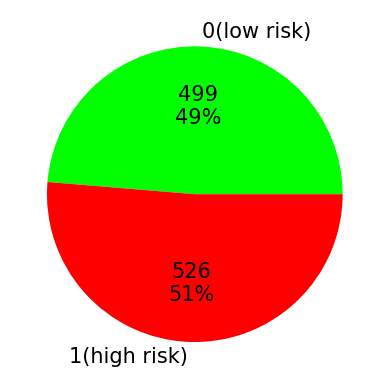

<Figure size 800x600 with 0 Axes>

In [6]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
labels = ["0(low risk)","1(high risk)"]
df.groupby('output').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, colors=['#00FF00','#FF0000'],labels=labels)
#plt.legend()
plt.show()
#print("*"*80)


counts = df["output"].value_counts().sort_values()
diag_cols = ["0(low_risk)", "1(high_risk)"]

diag_counts = [counts[0], counts[1]]

plt.figure(figsize = (8, 6))
clrs = ['#FFA500' if (x < max(diag_counts)) else '#FF4500' for x in diag_counts ]
# sns.barplot(x = diag_cols, y = diag_counts, palette=clrs)
plt.show()

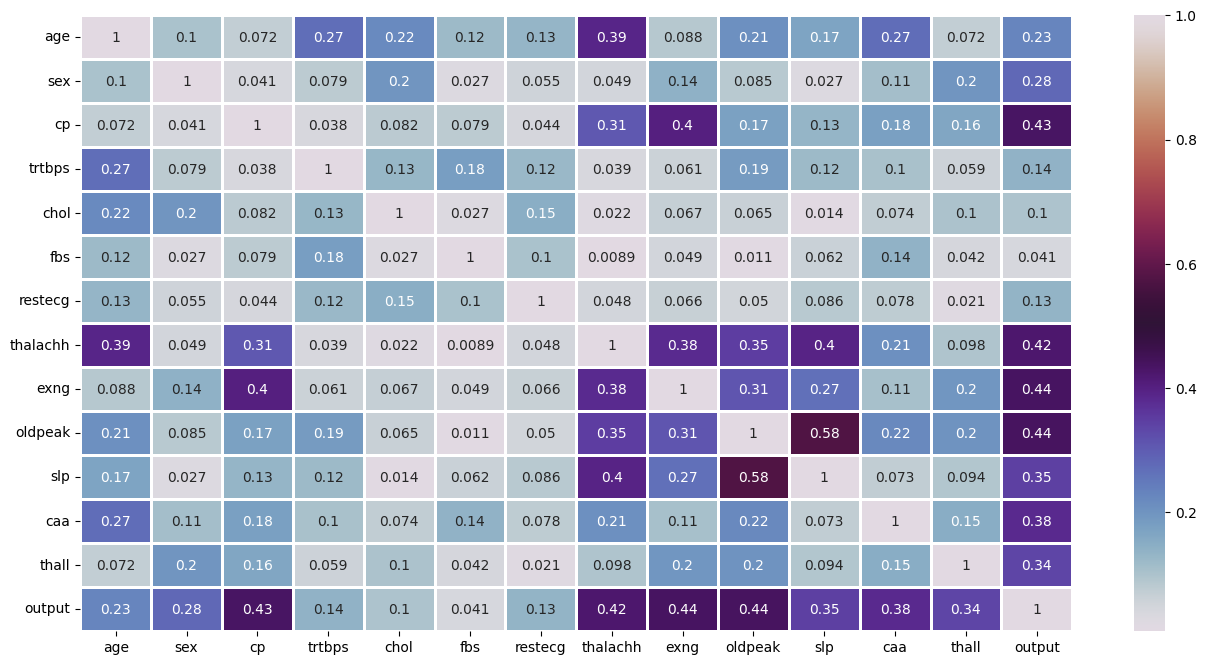

oldpeak     0.438441
exng        0.438029
cp          0.434854
thalachh    0.422895
caa         0.382085
slp         0.345512
thall       0.337838
sex         0.279501
age         0.229324
trtbps      0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: output, dtype: float64


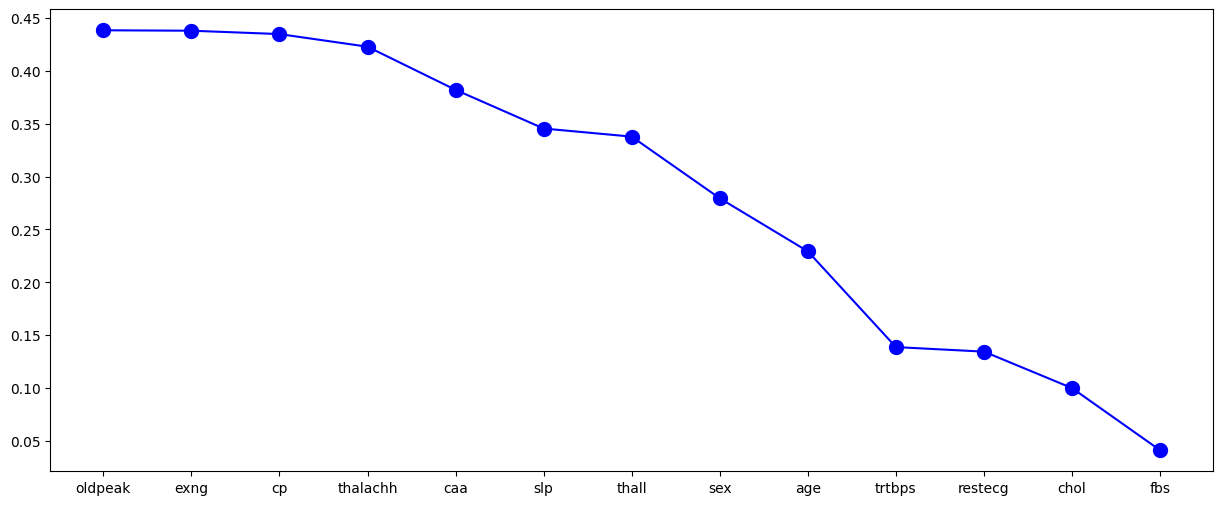

In [7]:
new_df=df
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="twilight")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="blue")
plt.scatter(C.index,C,color="blue",lw=5)
plt.show()

In [8]:
# Splitting the dataset into dependant and independant fetature

X = df.drop(["output"],axis =1)
y = df["output"]

In [9]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((820, 13), (820,), (205, 13), (205,))

In [10]:
#find and remove correlated features
def correlation(dataset,threshold):
    col_corr=set()#set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#we are interested in absolute coeff value
                colname=corr_matrix.columns[i]#getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features=correlation(X_train,0.4)
print('Number of correlated features : ',len(set(corr_features)))
corr_features

Number of correlated features :  1


{'slp'}

In [11]:
#remove the less important features from data
X = df.drop(["output",'slp'],axis =1)

# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((820, 12), (820,), (205, 12), (205,))

In [12]:
removed_columns = ["output", 'slp']
non_dropped_columns = [col for col in X if col not in removed_columns]
print(non_dropped_columns)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']


In [13]:
# instantiating the object
sv = SVC()

# fitting the model
sv.fit(X_train, y_train)

# calculating the predictions
y_pred = sv.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Support Vector Machine is ", accuracy_score(y_test, y_pred))
a_SVC = round(accuracy_score(y_test, y_pred) * 100,2)
f_SVC = round(f1_score(y_test, y_pred) * 100,2)
p_SVC = round(precision_score(y_test, y_pred) * 100,2)
r_SVC = round(recall_score(y_test, y_pred) * 100,2)

The test accuracy score of Support Vector Machine is  0.6829268292682927


In [14]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
a_Logistic_Regression = round(accuracy_score(y_test, y_pred) * 100,2)
f_Logistic_Regression = round(f1_score(y_test, y_pred) * 100,2)
p_Logistic_Regression = round(precision_score(y_test, y_pred) * 100,2)
r_Logistic_Regression = round(recall_score(y_test, y_pred) * 100,2)

The test accuracy score of Logistric Regression is  0.8


In [15]:
# instantiating the object
dt = DecisionTreeClassifier(max_depth = 5)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))
a_Decision_Tree = round(accuracy_score(y_test, y_pred) * 100,2)
f_Decision_Tree = round(f1_score(y_test, y_pred) * 100,2)
p_Decision_Tree = round(precision_score(y_test, y_pred) * 100,2)
r_Decision_Tree = round(recall_score(y_test, y_pred) * 100,2)

The test accuracy score of Decision Tree is  0.8439024390243902


In [16]:
# instantiating the object
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))
a_random_forest = round(accuracy_score(y_test, y_pred) * 100,2)
f_random_forest = round(f1_score(y_test, y_pred) * 100,2)
p_random_forest = round(precision_score(y_test, y_pred) * 100,2)
r_random_forest = round(recall_score(y_test, y_pred) * 100,2)

The test accuracy score of Random Forest is  0.8682926829268293


In [17]:
# instantiate the classifier
k = KNeighborsClassifier()
# fitting the model
k.fit(X_train,y_train)

# predicting values
y_pred = k.predict(X_test)
print("The test accuracy score of KNN Classifier is ", accuracy_score(y_test, y_pred))
a_k_neighbors = round(accuracy_score(y_test, y_pred) * 100,2)
f_k_neighbors = round(f1_score(y_test, y_pred) * 100,2)
p_k_neighbors = round(precision_score(y_test, y_pred) * 100,2)
r_k_neighbors = round(recall_score(y_test, y_pred) * 100,2)

The test accuracy score of KNN Classifier is  0.7317073170731707


In [18]:
# instantiate the classifier
gbt = GradientBoostingClassifier()

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))
a_Gradient_Boosting = round(accuracy_score(y_test, y_pred) * 100,2)
f_Gradient_Boosting = round(f1_score(y_test, y_pred) * 100,2)
p_Gradient_Boosting = round(precision_score(y_test, y_pred) * 100,2)
r_Gradient_Boosting = round(recall_score(y_test, y_pred) * 100,2)

The test accuracy score of Gradient Boosting Classifier is  0.9560975609756097


In [19]:
# instantiate the classifier
clf = GaussianNB()

# train the model
clf.fit(X_train, y_train)

# predict the labels of the test set
y_pred = clf.predict(X_test)

# calculate the accuracy score
print("The test accuracy score of Naive Bayes is ", accuracy_score(y_test, y_pred))
a_Naive_Bayes = round(accuracy_score(y_test, y_pred) * 100,2)
f_Naive_Bayes = round(f1_score(y_test, y_pred) * 100,2)
p_Naive_Bayes = round(precision_score(y_test, y_pred) * 100,2)
r_Naive_Bayes = round(recall_score(y_test, y_pred) * 100,2)

The test accuracy score of Naive Bayes is  0.7951219512195122


In [20]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Logistic Regression','Naive Bayes'],
    'Accuracy': [a_Gradient_Boosting, a_random_forest, a_SVC, a_k_neighbors, a_Decision_Tree, a_Logistic_Regression, a_Naive_Bayes],
    'F1-Score': [f_Gradient_Boosting, f_random_forest, f_SVC, f_k_neighbors, f_Decision_Tree, f_Logistic_Regression, f_Naive_Bayes ],
    'Precision': [p_Gradient_Boosting, p_random_forest, p_SVC, p_k_neighbors, p_Decision_Tree, p_Logistic_Regression, p_Naive_Bayes ],
    'Recall': [r_Gradient_Boosting, r_random_forest, r_SVC, r_k_neighbors, r_Decision_Tree, r_Logistic_Regression, r_Naive_Bayes ]
             })

models.sort_values(by='Accuracy', ascending=False)


# dispalying total result
models

,Model,Accuracy,F1-Score,Precision,Recall
0,Gradient Boosting,95.61,95.61,96.08,95.15
1,Random Forest,86.83,87.56,83.33,92.23
2,Support Vector Machine,68.29,70.59,66.10,75.73
3,K-Nearest Neighbors,73.17,73.43,73.08,73.79
4,Decision Tree,84.39,85.96,78.40,95.15
5,Logistic Regression,80.00,82.10,74.60,91.26
6,Naive Bayes,79.51,80.56,76.99,84.47


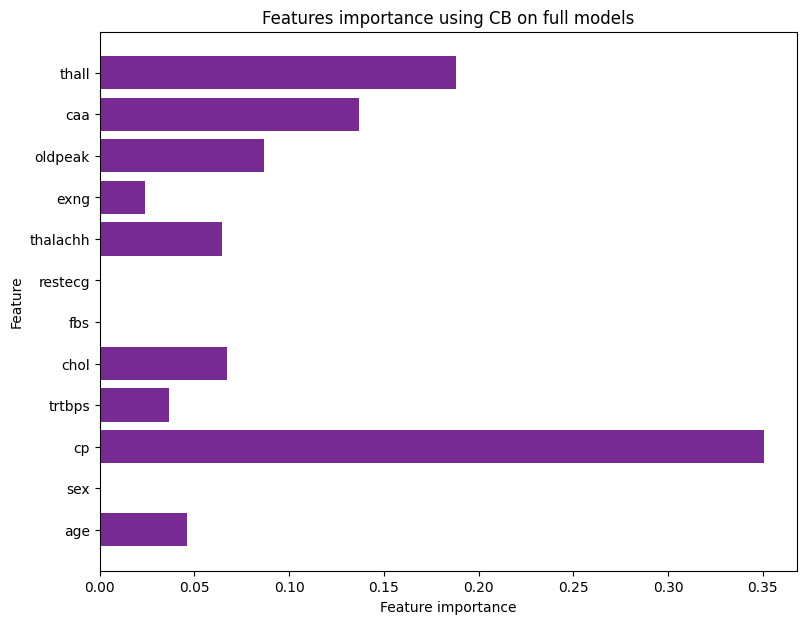

In [21]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
selected_features = X_train.shape[1]
plt.barh(range(selected_features), dt.feature_importances_, align='center',color='#772B92')
# Create a list of the feature names
feature_names =['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']

# Set the tick labels for the plot
plt.yticks(np.arange(selected_features), feature_names)

#plt.yticks(np.arange(selected_features),feature_names)
plt.title("Features importance using CB on full models")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()